<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/LightGBM%EC%9C%BC%EB%A1%9C_%EC%82%AC%EA%B8%B0%EA%B1%B0%EB%9E%98_%ED%83%90%EC%A7%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/sample_data/fraud.txt')

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [6]:
round(data.describe(), 2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


In [7]:
data.drop(['merchant', 'street', 'first', 'last', 'city', 'state', 'zip', 'job', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


In [10]:
data['cc_num'].value_counts()

6538441737335434       4392
30270432095985         4392
6538891242532018       4386
4364010865167176       4386
4642255475285942       4386
                       ... 
4714017207228610634       7
4352307151555405069       7
180097223252063           7
6011732631674654          7
4295296907373             6
Name: cc_num, Length: 999, dtype: int64

In [11]:
data.groupby('cc_num').std()['amt']

<ipython-input-11-0bd964bfdf52>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('cc_num').std()['amt']


cc_num
60416207185             142.869746
60422928733              92.042844
60423098130            1000.693872
60427851591             131.014534
60487002085             153.207660
                          ...     
4958589671582726883     137.504101
4973530368125489546     258.847061
4980323467523543940     119.903167
4989847570577635369     128.396760
4992346398065154184     140.982586
Name: amt, Length: 999, dtype: float64

In [12]:
amt_info = data.groupby('cc_num').agg(['mean', 'std'])['amt']

<ipython-input-12-b8cccb9c9095>:1: FutureWarning: ['trans_date_trans_time', 'category', 'gender', 'dob'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  amt_info = data.groupby('cc_num').agg(['mean', 'std'])['amt']


In [13]:
amt_info.reset_index(inplace = True)

In [14]:
data = data.merge(amt_info, on = 'cc_num', how = 'left')

In [15]:
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std']

In [16]:
data.drop(['mean', 'std'], axis = 1, inplace = True)

In [17]:
category_info = data.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index()

<ipython-input-17-298579630222>:1: FutureWarning: ['trans_date_trans_time', 'gender', 'dob'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  category_info = data.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index()


In [18]:
data = data.merge(category_info, on = ['cc_num', 'category'], how = 'left')

In [19]:
data['cat_z_score'] = (data['amt'] - data['mean']) / data['std']

In [20]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,mean,std,cat_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,84.860809,116.070300,-0.688297
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424,0.317631
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,46.653103,60.385161,2.872509
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,61.537283,15.746841,-1.050197
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,35.481357,4.934731,1.312866


In [21]:
import geopy.distance

In [22]:
data['distance'] = data.apply(lambda x: geopy.distance.distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)

In [23]:
distance_info = data.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index()

<ipython-input-23-fa745ff00ab4>:1: FutureWarning: ['trans_date_trans_time', 'category', 'gender', 'dob'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  distance_info = data.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index()


In [24]:
data = data.merge(distance_info, on = 'cc_num', how = 'left')

In [25]:
data.drop(['mean_x', 'std_x'], axis = 1, inplace = True)

In [26]:
data['dist_z_score'] = (data['distance'] - data['mean_y']) / data['std_y']

In [27]:
data.drop(['mean_y', 'std_y'], axis = 1, inplace = True)

In [28]:
data['dob'] = pd.to_datetime(data['dob'])

In [29]:
data['age'] = 2023 - data['dob'].dt.year

In [30]:
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,distance,dist_z_score,age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,78.773821,0.030974,35
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,30.216618,-1.475224,45
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,108.102912,1.160572,61
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,95.685115,0.818063,56
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,77.702395,0.064037,37


In [31]:
data.drop(['cc_num', 'lat', 'long', 'merch_lat', 'merch_long', 'dob'], axis = 1, inplace = True)

In [32]:
data = pd.get_dummies(data, columns = ['category', 'gender'], drop_first = True, dtype=int)

In [33]:
data.head(3)

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,dist_z_score,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,35,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,61,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
data.set_index('trans_date_trans_time', inplace = True)

In [35]:
data.isna().mean()

amt                        0.000000
city_pop                   0.000000
is_fraud                   0.000000
amt_z_score                0.000000
cat_z_score                0.000118
distance                   0.000000
dist_z_score               0.000000
age                        0.000000
category_food_dining       0.000000
category_gas_transport     0.000000
category_grocery_net       0.000000
category_grocery_pos       0.000000
category_health_fitness    0.000000
category_home              0.000000
category_kids_pets         0.000000
category_misc_net          0.000000
category_misc_pos          0.000000
category_personal_care     0.000000
category_shopping_net      0.000000
category_shopping_pos      0.000000
category_travel            0.000000
gender_M                   0.000000
dtype: float64

In [36]:
data.index

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [37]:
train = data[data.index < '2020-07-01']
test = data[data.index >= '2020-07-01']

In [38]:
len(test) / len(data)

0.2837738623640543

In [39]:
X_train = train.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [40]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [41]:
lgbm = LGBMClassifier(random_state = 100)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852394 entries, 2019-01-01 00:00:18 to 2020-12-31 23:59:34
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city_pop                 int64  
 2   is_fraud                 int64  
 3   amt_z_score              float64
 4   cat_z_score              float64
 5   distance                 float64
 6   dist_z_score             float64
 7   age                      int64  
 8   category_food_dining     int64  
 9   category_gas_transport   int64  
 10  category_grocery_net     int64  
 11  category_grocery_pos     int64  
 12  category_health_fitness  int64  
 13  category_home            int64  
 14  category_kids_pets       int64  
 15  category_misc_net        int64  
 16  category_misc_pos        int64  
 17  category_personal_care   int64  
 18  category_shopping_net    int64  
 19  category_shopping_pos    int64  
 20  category_trav

In [43]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


LGBMClassifier(random_state=100)

In [44]:
train_pred = lgbm.predict(X_train)
test_pred = lgbm.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [46]:
accuracy_score(y_test, test_pred)

0.9970760623291437

In [47]:
confusion_matrix(y_test,test_pred)

array([[522933,    716],
       [   821,   1191]])

In [48]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



In [49]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
train_pred_proba = lgbm.predict_proba(X_train)
test_pred_proba = lgbm.predict_proba(X_test)

In [51]:
test_pred_proba = test_pred_proba[:, 1]

In [52]:
roc_auc_score(y_test, test_pred_proba)

0.9366009328741358

In [53]:
# 모델 간 비교 시 auc 사용

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params = {
    'n_estimotors' : [100, 200],
    'learning_rate' : [0.01, 0.1],
    'max_depth' : [5, 10]
}

In [56]:
lgbm_grid = LGBMClassifier(random_state = 100)

In [57]:
gs_model = GridSearchCV(lgbm_grid, params, n_jobs = -1, scoring = 'f1', cv = None)

In [58]:
gs_model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

GridSearchCV(estimator=LGBMClassifier(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimotors': [100, 200]},
             scoring='f1')

In [59]:
gs_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimotors': 100}

In [60]:
test_pred = gs_model.predict_proba(X_test)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [61]:
test_pred = test_pred[:, 1]

In [62]:
roc_auc_score(y_test, test_pred)

0.9739725740209929

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
params = {
    'n_estimotors' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.05],
    'max_depth' : [5, 10, 20],
    'lambda_l1' : [0, 10, 20],
    'lambda_l2' : [0, 10, 20]
}

In [65]:
lgbm_r_grid = LGBMClassifier(random_state= 100)

In [66]:
r_grid_model = RandomizedSearchCV(lgbm_r_grid, params, n_jobs = -1, scoring = 'f1', n_iter = 10)

In [67]:
r_grid_model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037377 seconds.
You can set `force_row_wise=true` to remove the overhead

RandomizedSearchCV(estimator=LGBMClassifier(random_state=100), n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.1, 0.05],
                                        'max_depth': [5, 10, 20],
                                        'n_estimotors': [100, 200, 300]},
                   scoring='f1')

In [68]:
r_grid_model.best_params_

{'n_estimotors': 300,
 'max_depth': 10,
 'learning_rate': 0.1,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [69]:
r_grid_pred = r_grid_model.predict_proba(X_test)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [71]:
r_grid_pred = r_grid_pred[:, 1]

In [72]:
roc_auc_score(y_test, r_grid_pred)

0.9950952170407106

In [73]:
final_model = LGBMClassifier(**r_grid_model.best_params_)

In [74]:
final_model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073514 seconds.
You can set `force_row_wise=true` to remove the overhead

LGBMClassifier(lambda_l1=0, lambda_l2=20, max_depth=10, n_estimotors=300)

In [75]:
final_pred = final_model.predict_proba(X_test)

[LightGBM] [Warning] Unknown parameter: n_estimotors
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [76]:
final_pred = final_pred[:, 1]

In [77]:
roc_auc_score(y_test, final_pred)

0.9949564617948768

In [78]:
final_model.feature_importances_

array([771, 338, 220, 448,  43,  43, 417,  58,  54,  16,  54,  17,  45,
        41,  42, 103,  35,  43,  55,  51, 106], dtype=int32)

In [81]:
f_imp = pd.DataFrame({'feature_names' : X_train.columns, 'importances' : final_model.feature_importances_}).sort_values('importances', ascending = False)

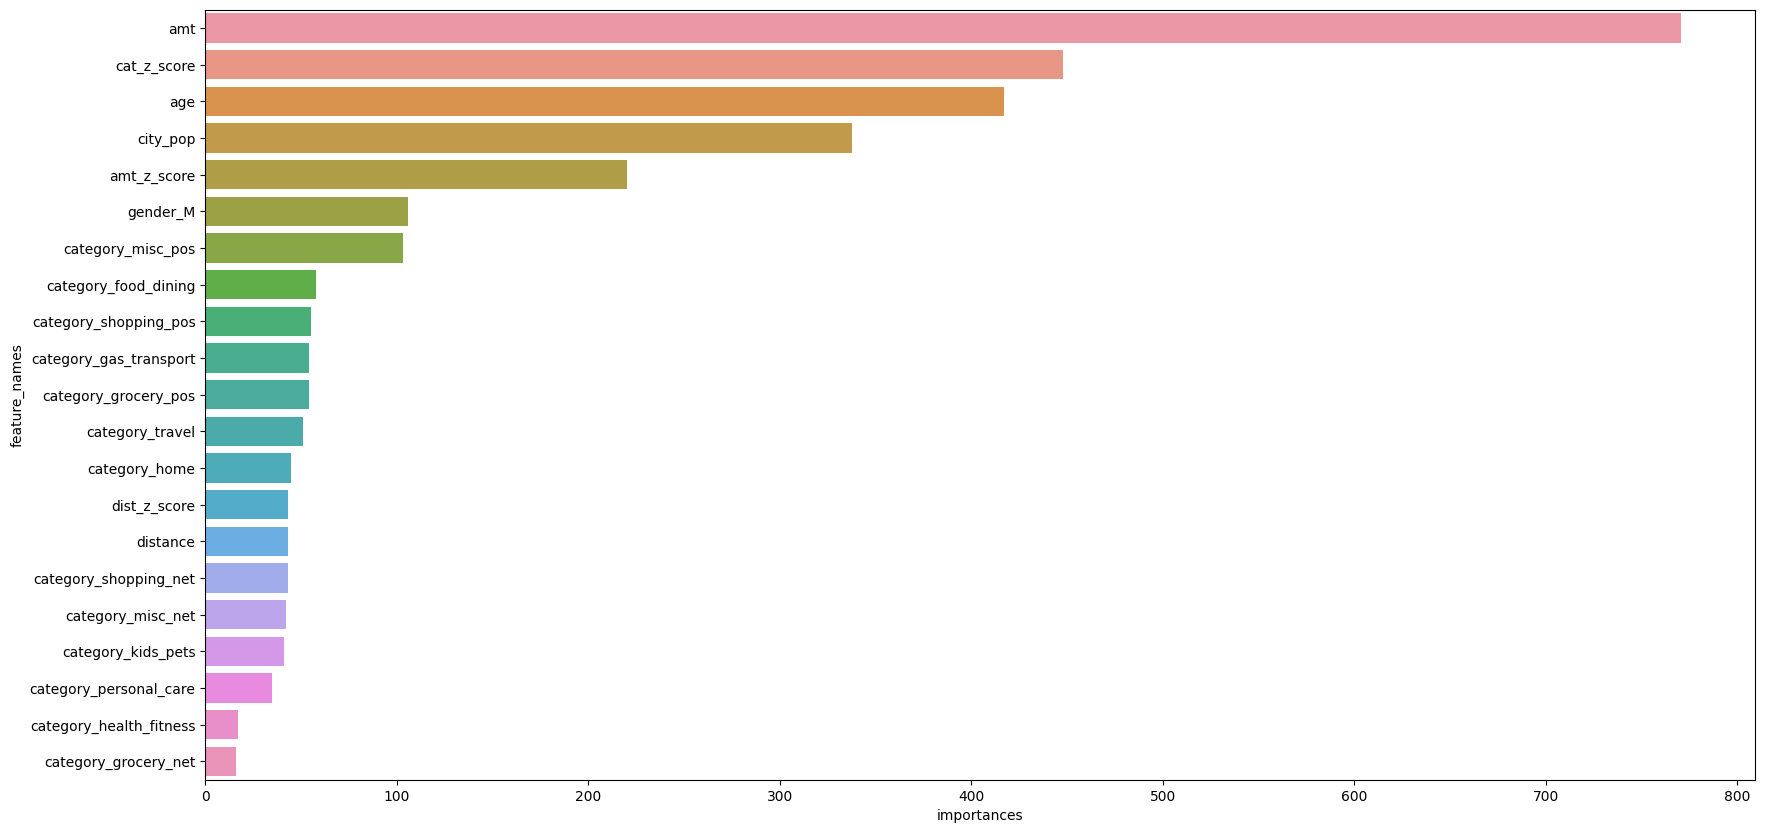

In [83]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'importances', y = 'feature_names', data = f_imp)
plt.show()

In [85]:
pred_5 = (final_pred > 0.5).astype('int')
pred_3 = (final_pred > 0.3).astype('int')
pred_7 = (final_pred > 0.7).astype('int')

In [86]:
print(classification_report(y_test, pred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.77      0.61      0.68      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.81      0.84    525661
weighted avg       1.00      1.00      1.00    525661



In [87]:
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.64      0.72      0.67      2012

    accuracy                           1.00    525661
   macro avg       0.82      0.86      0.84    525661
weighted avg       1.00      1.00      1.00    525661



In [88]:
print(classification_report(y_test, pred_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.94      0.43      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.97      0.72      0.80    525661
weighted avg       1.00      1.00      1.00    525661

